# k-means

In [1]:
import numpy
import matplotlib.pyplot as plt

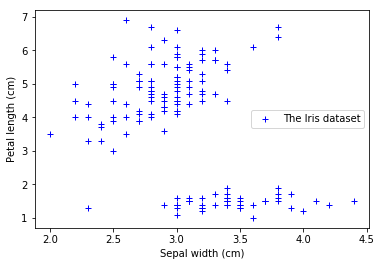

In [2]:
X = numpy.loadtxt('data/iris_2d.csv')

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal length (cm)')
plt.plot(X[:,0], X[:,1], "b+", label="The Iris dataset")
plt.legend()
plt.show()


In [3]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100, seed=0, verbose=0):
        """ Constructor for the model.

        Parameters
        ----------
        n_clusters : int
            The number of clusters that should be
            found via the K-Means clustering approach.
        max_iter : int
            The maximum number of iterations (stopping condition)
        seed : int
            Number that is used to initialize the random 
            number generator.
        """
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.seed = seed
    
    def fit(self, X):
        """
        Fits the K-Means model. The cluster assignments and
        cluster means after the iterative procedure.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        """         
        
        # initialize the random number generator
        numpy.random.seed(self.seed)
        
        # selects self.n_clusters random points from X
        # that depict the initial cluster centers
        random_indices = numpy.random.choice(len(X), self.n_clusters, replace=False)
        cluster_means = X[random_indices]
        
        for _ in range(self.max_iter):
            cluster_assignments = self._assign_to_clusters(X, cluster_means)
            cluster_means = self._update_means(X, cluster_means, cluster_assignments)
            
        
        # once done, store the cluster means and the assignments
        self.cluster_assignments = cluster_assignments
        self.cluster_means = cluster_means
        
    def _assign_to_clusters(self, X, means):
        """
        Assigns all the points given in X to the 
        means; returns a Numpy array containing the
        assignments.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
            The points for which the cluster assignments
            shall be computed.
        means : Array of shape [n_clusters, n_features]
            The cluster means.
        
        Returns
        -------
        assignments : Array of length n_samples
            For each element in X, it should contain
            the index of its closest cluster mean.
        """          
        
        assignments = []
        
        for x in X:
            def euclid_dist(m):
                #knows x, takes m which is a row in "means"
                return numpy.sqrt(sum([(p - q)**2 for p, q in zip(m, x)]))
            
            all_mean_dist = [euclid_dist(m) for m in means]
            assignments.append(all_mean_dist.index(min(all_mean_dist)))
        
        return numpy.array(assignments)
    
    def _update_means(self, X, means, assignments):
        """
        Assigns all the points given in X to the 
        means; returns a Numpy array containing the
        assignments.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
            The points for which the cluster assignments
            shall be computed.
        means : Array of shape [n_clusters, n_features]
            The cluster means.
        assignments : Array of length n_samples
            The current assignments of the points in 
            X to the cluster means.
        
        Returns
        -------
        updated_means : Array of shape [n_samples, n_features]
            The updated cluster means.
        """              
        
        # array storing the updated cluster means
        updated_means = []
        
        for i in range(self.n_clusters):
            S = numpy.array([row for row, a in zip(X, assignments) if a == i])
            dividend = numpy.sum(S, axis=0)
            new_mean = numpy.divide(dividend, S.shape[0])
            updated_means.append(new_mean)
            
            
        return updated_means

In [4]:
# DO NOT CHANGE ME
model = KMeans(n_clusters=3, max_iter=30, seed=0)
model.fit(X)
print("Cluster means: %s" % str(model.cluster_means))

Cluster means: [array([ 3.03255814,  5.67209302]), array([ 2.75087719,  4.32807018]), array([ 3.418,  1.464])]


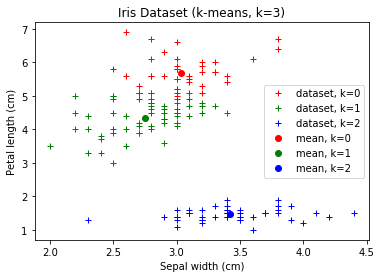

In [5]:
cluster0 = numpy.array([x for x, a in zip(X, model.cluster_assignments) if a == 0])
cluster1 = numpy.array([x for x, a in zip(X, model.cluster_assignments) if a == 1])
cluster2 = numpy.array([x for x, a in zip(X, model.cluster_assignments) if a == 2])

cm0 = model.cluster_means[0]
cm1 = model.cluster_means[1]
cm2 = model.cluster_means[2]

plt.plot(cluster0[:, 0], cluster0[:, 1], "r+", label="dataset, k=0")
plt.plot(cluster1[:, 0], cluster1[:, 1], "g+", label="dataset, k=1")
plt.plot(cluster2[:, 0], cluster2[:, 1], "b+", label="dataset, k=2")

plt.plot(cm0[0], cm0[1], "ro", label="mean, k=0")
plt.plot(cm1[0], cm1[1], "go", label="mean, k=1")
plt.plot(cm2[0], cm2[1], "bo", label="mean, k=2")

plt.title("Iris Dataset (k-means, k=3)")
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal length (cm)')

plt.legend()
plt.show()
